In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
from sklearn import datasets
import time

Could not import rpy package
Could not import r-package RCIT


In [22]:
data = pd.read_csv("/home/pbatungwanay/Bureau/onset_cessation_data_muyinga.csv", index_col=[0], parse_dates=True)
data.head()

,Muy_onset,Muy_cessation,Muy_duration,Season A,Season B,Muy_Annual,PCI_Muy,Crop_Index
Year,,,,,,,,
1986-01-01,97,335,238,428.3,658.4,1248.1,14.92468,82.71
1987-01-01,67,358,291,636.7,696.0,1505.3,13.42726,85.61
1988-01-01,95,333,238,423.1,655.1,1473.8,14.06886,87.52
1989-01-01,87,339,252,440.4,548.4,1104.3,11.50081,82.02
1990-01-01,86,309,223,416.4,512.9,1051.4,12.11210,89.05


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 1986-01-01 to 2017-01-01
Data columns (total 8 columns):
Muy_onset        32 non-null int64
Muy_cessation    32 non-null int64
Muy_duration     32 non-null int64
Season A         32 non-null float64
Season B         32 non-null float64
Muy_Annual       32 non-null float64
PCI_Muy          32 non-null float64
Crop_Index       32 non-null float64
dtypes: float64(5), int64(3)
memory usage: 2.2 KB


In [24]:
data.head()

,Muy_onset,Muy_cessation,Muy_duration,Season A,Season B,Muy_Annual,PCI_Muy,Crop_Index
Year,,,,,,,,
1986-01-01,97,335,238,428.3,658.4,1248.1,14.92468,82.71
1987-01-01,67,358,291,636.7,696.0,1505.3,13.42726,85.61
1988-01-01,95,333,238,423.1,655.1,1473.8,14.06886,87.52
1989-01-01,87,339,252,440.4,548.4,1104.3,11.50081,82.02
1990-01-01,86,309,223,416.4,512.9,1051.4,12.11210,89.05


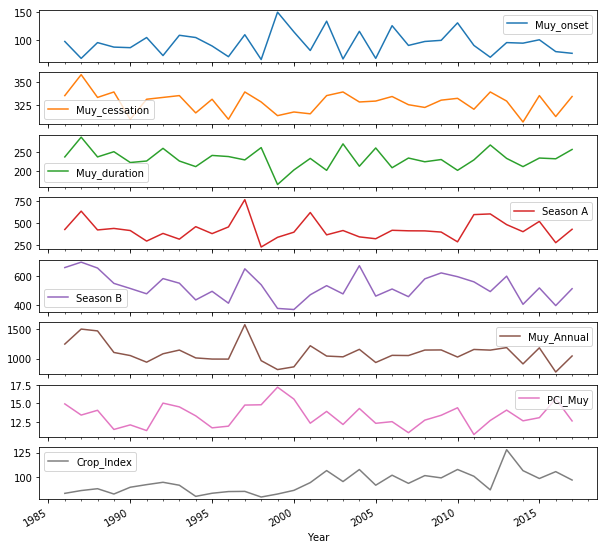

In [25]:
data.plot(subplots=True, figsize=(10, 10))
plt.show()

In [26]:
data.head()

,Muy_onset,Muy_cessation,Muy_duration,Season A,Season B,Muy_Annual,PCI_Muy,Crop_Index
Year,,,,,,,,
1986-01-01,97,335,238,428.3,658.4,1248.1,14.92468,82.71
1987-01-01,67,358,291,636.7,696.0,1505.3,13.42726,85.61
1988-01-01,95,333,238,423.1,655.1,1473.8,14.06886,87.52
1989-01-01,87,339,252,440.4,548.4,1104.3,11.50081,82.02
1990-01-01,86,309,223,416.4,512.9,1051.4,12.11210,89.05


In [27]:
data.columns

Index(['Muy_onset', 'Muy_cessation', 'Muy_duration', 'Season A', 'Season B',
       'Muy_Annual', 'PCI_Muy', 'Crop_Index'],
      dtype='object')

In [28]:
data=data.diff()

# remplissage des données manquantes
data = data.fillna(999)



#T = 21     # time series length
#data, true_parents_neighbors = pp.var_process(data, T=T)
#T, N = data.shape
# préparation de la dataframe au format "tigramite"
datatime = np.arange(len(data.values))
datatime


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [29]:
dataframe = pp.DataFrame(data.values,var_names =data.columns,  # nom des variables
                         missing_flag=999)   # valeurs manquantes reconnues


In [30]:
var_names=["Kir_onset" ,"Kir_cessation" ,"Kir_duration" ,"Muy_onset", "Muy_cessation", "Muy_duration" ,"Kir_Annual","Muy_Annual", "PCI_Kir" ,"PCI_Muy","Crop_Index"]

In [31]:
#dataframe = pp.DataFrame(data, var_names = var_names)
#datatime = np.arange(len(data))

In [32]:
#datatime = np.arange(len(data)) # simplification de l'index

# nom des variables
                          #missing_flag=999)   # valeurs manquantes reconnues

#var_names = var_names

(<Figure size 720x360 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb74906e8d0>,
       dtype=object))

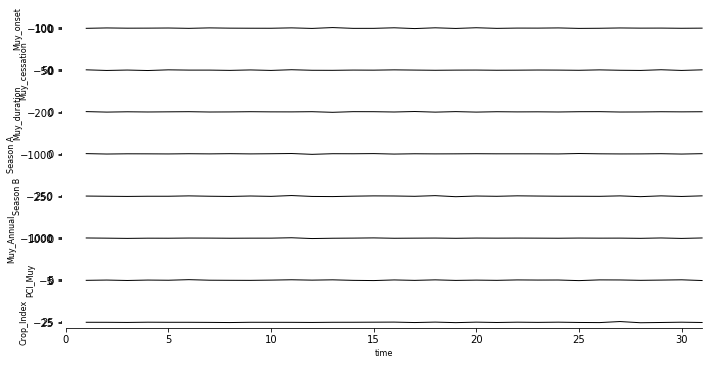

In [34]:
tp.plot_timeseries(dataframe,figsize=(10, 5))
                     # visualisation de la dataframe tigramite
#plt.show()


In [35]:
start_time = time.time()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=0)

results = pcmci.run_pcmci(tau_max=1, pc_alpha=0.01)

pcmci.print_significant_links(
       p_matrix = results['p_matrix'], 
       val_matrix = results['val_matrix'],
       alpha_level = 0.05)
                
print("--- %.2f secondes ---" % (time.time() - start_time))


## Significant links at alpha = 0.05:

    Variable Muy_onset has 3 link(s):
        (Muy_duration 0): pval = 0.00000 | val = -0.836
        (Muy_onset -1): pval = 0.00001 | val = -0.730
        (PCI_Muy 0): pval = 0.04004 | val = 0.398

    Variable Muy_cessation has 3 link(s):
        (Muy_cessation -1): pval = 0.00074 | val = -0.600
        (Season B 0): pval = 0.00434 | val = 0.523
        (Muy_Annual 0): pval = 0.04102 | val = 0.396

    Variable Muy_duration has 4 link(s):
        (Muy_onset 0): pval = 0.00000 | val = -0.836
        (Muy_onset -1): pval = 0.00066 | val = 0.604
        (Muy_duration -1): pval = 0.00064 | val = -0.596
        (Crop_Index 0): pval = 0.00962 | val = -0.473

    Variable Season A has 4 link(s):
        (Muy_Annual 0): pval = 0.00021 | val = 0.646
        (Season B -1): pval = 0.00163 | val = -0.559
        (Muy_Annual -1): pval = 0.00225 | val = -0.554
        (Season A -1): pval = 0.00834 | val = -0.480

    Variable Season B has 6 link(s):
        

In [36]:
# Sauvegarde des résultats

np.save('/home/pbatungwanay/Bureau/Muyinga/p_diff_kir',results['p_matrix'])
np.save('/home/pbatungwanay/Bureau/Muyinga/val_diff_kir',results['val_matrix'])

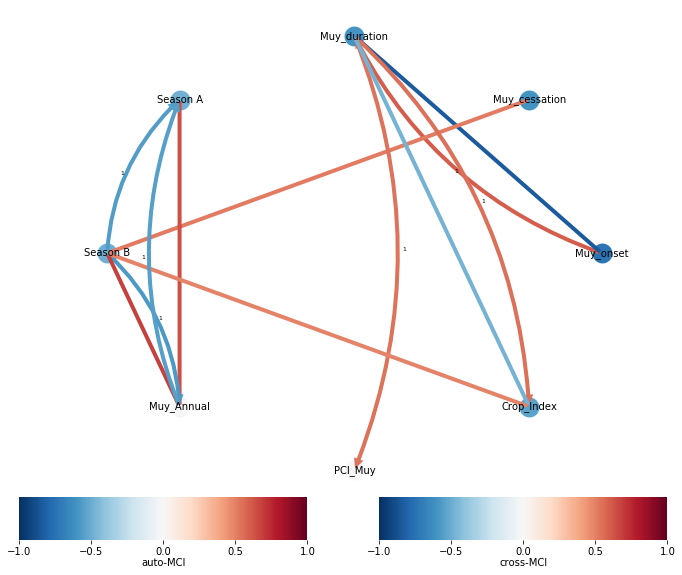

In [37]:
p = np.load('/home/pbatungwanay/Bureau/Muyinga/p_diff_kir.npy')
val = np.load('/home/pbatungwanay/Bureau/Muyinga/val_diff_kir.npy')

link_matrix = pcmci.return_significant_parents(pq_matrix=p,
                                                       val_matrix=val,
                                                       alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=val,
    figsize=(10, 10),
    node_size=20,
    arrowhead_size=2.0,
    arrow_linewidth=20.0,
    link_matrix=link_matrix,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r')
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/diff_ENTIER.eps')
  


In [58]:
# pour afficher uniquement les liens vers
mb1 = np.zeros((6,6,4), dtype=bool)
mb1[:,3,:] = link_matrix[:,3,:]
mb1[3,:,:] = link_matrix[3,:,:]
link_matrix1 = mb1

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix1,
    var_names=df.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/diff_DD.eps')



ValueError: could not broadcast input array from shape (6,2) into shape (6,4)

In [ ]:
# pour afficher uniquement les liens vers RG
mb2 = np.zeros((9,9,11), dtype=bool)
mb2[:,3,:] = link_matrix[:,3,:]
mb2[3,:,:] = link_matrix[3,:,:]
link_matrix2 = mb2

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix2,
    var_names=df.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=10)
plt.savefig('/home/pbatungwanay/Bureau/Muyinga/diff_RG.eps')

In [45]:
tp.plot_graph(
    val_matrix=val,
    figsize=(7, 7),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix2,
    var_names=data.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=-1,
    vmax_edges = 1,
    edge_ticks=0.5,
    vmin_nodes=-1,
    vmax_nodes=1,
    node_ticks=.5,
    cmap_nodes='RdBu_r',
    link_label_fontsize=5,
    show_colorbar=0)

NameError: name 'link_matrix2' is not defined

In [6]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)

NameError: name 'pcmci' is not defined

In [47]:
import seaborn as sns

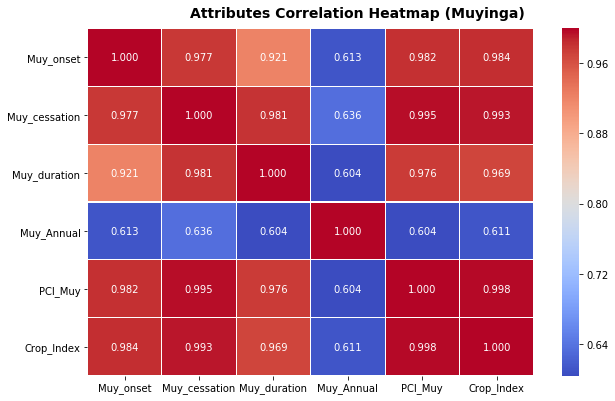

In [48]:
corr = data.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
#ax = sns.heatmap(
#   corr, 
#    vmin=-1, vmax=1, center=0,
#    cmap=sns.diverging_palette(20, 220, n=200),
#    square=False, annot=True
#)
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.3f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)



#ax.set_xticklabels(
 #   ax.get_xticklabels(),
  #  rotation=45,
   # horizontalalignment='right'
#);

fig.subplots_adjust(top=0.93)
fig.suptitle('Attributes Correlation Heatmap (Muyinga)', 
              fontsize=14, 
              fontweight='bold')

plt.savefig('/home/pbatungwanay/Bureau/Muyinga/Corr.eps')

In [49]:
T, N = data.shape;
T;
N

6

In [50]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable Muy_onset

## Variable Muy_cessation

## Variable Muy_duration

## Variable Muy_Annual

## Variable PCI_Muy

## Variable Crop_Index

## Resulting condition sets:

    Variable Muy_onset has 3 parent(s):
    [pc_alpha = 0.3]
        (Muy_onset -1): max_pval = 0.17888, min_val = 0.381
        (Muy_Annual -8): max_pval = 0.25723, min_val = 0.339
        (Muy_cessation -6): max_pval = 0.24311, min_val = 0.327

    Variable Muy_cessation has 6 parent(s):
    [pc_alpha = 0.5]
        (Muy_cessation -1): max_pval = 0.08445, min_val = 0.496
        (Muy_Annual -2): max_pval = 0.23708, min_val = 0.353
        (Crop_Index -1): max_pval = 0.31614, min_val = 0.302
        (Muy_Annual -3): max_pval = 0.41930, min_val = 0.265
        (Muy_Annual -6): max_pval = 0.34760, min_val = 0.261
        (Muy_Annual -7): max_pval = 0

In [51]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/home/pbatungwanay/Bureau/onset_cessation_data_muyinga.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

            Muy_onset  Muy_cessation  Muy_duration  Muy_Annual   PCI_Muy  \
Year                                                                       
1986-01-01         97            335           238      1248.1  14.92468   
1987-01-01         67            358           291      1505.3  13.42726   
1988-01-01         95            333           238      1473.8  14.06886   
1989-01-01         87            339           252      1104.3  11.50081   
1990-01-01         86            309           223      1051.4  12.11210   

            Crop_Index  
Year                    
1986-01-01       82.71  
1987-01-01       85.61  
1988-01-01       87.52  
1989-01-01       82.02  
1990-01-01       89.05  


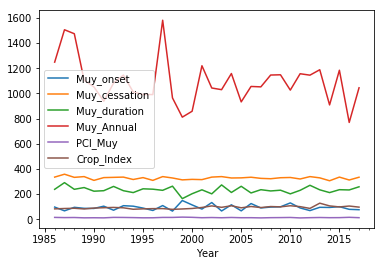

In [53]:
series.plot()
pyplot.show()